In [8]:
#load file info:
import json
import matplotlib.pyplot as plt

def analyse_file(data, name):
    # Separate the data by measurement type
    duration_data = [op for op in data if op['m_type'] == 'Duration']
    output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
    dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

    # Function to process data for plotting
    def process_data(data):
        for operation in data:
            operation['value'] = operation['count'] * operation['mean']
        
        sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
        
        labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
        values = [op['value'] for op in sorted_operations]
        total_sum = sum(values)
        
        # Print the operations along with their values
        print(f"Total sum for {data[0]['m_type']}: {total_sum}")
        print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
        for operation in sorted_operations:
            print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
        
        return labels, values

    # Process data for each measurement type
    duration_labels, duration_values = process_data(duration_data)
    output_size_labels, output_size_values = process_data(output_size_data)
    dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

    # Function to plot data
    def plot_data(labels, values, title):
        plt.figure(figsize=(10, 8))
        plt.barh(labels, values, color='skyblue')
        plt.grid()
        plt.xscale('log')
        plt.xlabel('Value')
        plt.ylabel('Operation')
        plt.title(title)
        plt.gca().invert_yaxis()  # To have the longest value at the top
        plt.show()

    # Plot data for each measurement type
    plot_data(duration_labels, duration_values, f'WebGpu Shader-Invocation Durations while simulating {name} (Duration)')
    plot_data(output_size_labels, output_size_values, f'WebGpu Shader-Invocation Output Sizes while simulating {name} (OutputSize)')
    plot_data(dispatch_size_labels, dispatch_size_values, f'WebGpu Shader-Invocation Dispatch Sizes while simulating {name} (DispatchSize)')

Total sum for Duration: 0.7190579200000002
Operations sorted by total duration for Duration:
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.15707136, Count: 12240 Perc:21.84%
Operation: copy2d dtype:F32, Duration: 0.123035648, Count: 12216 Perc:17.11%
Operation: matmul4end, dtype:F32, Duration: 0.12007526400000001, Count: 14026 Perc:16.70%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.053079039999999994, Count: 6120 Perc:7.38%
Operation: copy strided dtype:F32, Duration: 0.038191104, Count: 3048 Perc:5.31%
Operation: rms_norm, dtype:F32, Duration: 0.037336064, Count: 3315 Perc:5.19%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.028658688, Count: 3060 Perc:3.99%
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.026674176, Count: 3060 Perc:3.71%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth,

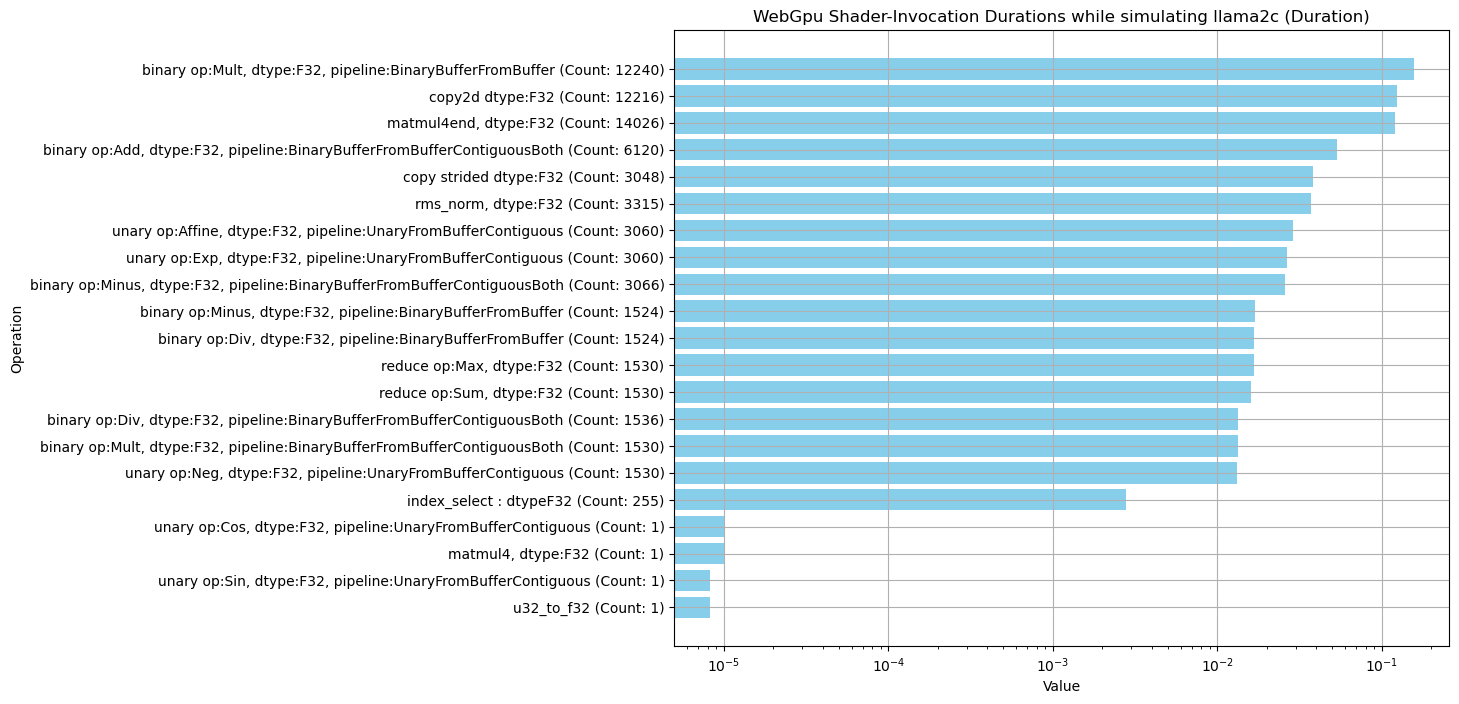

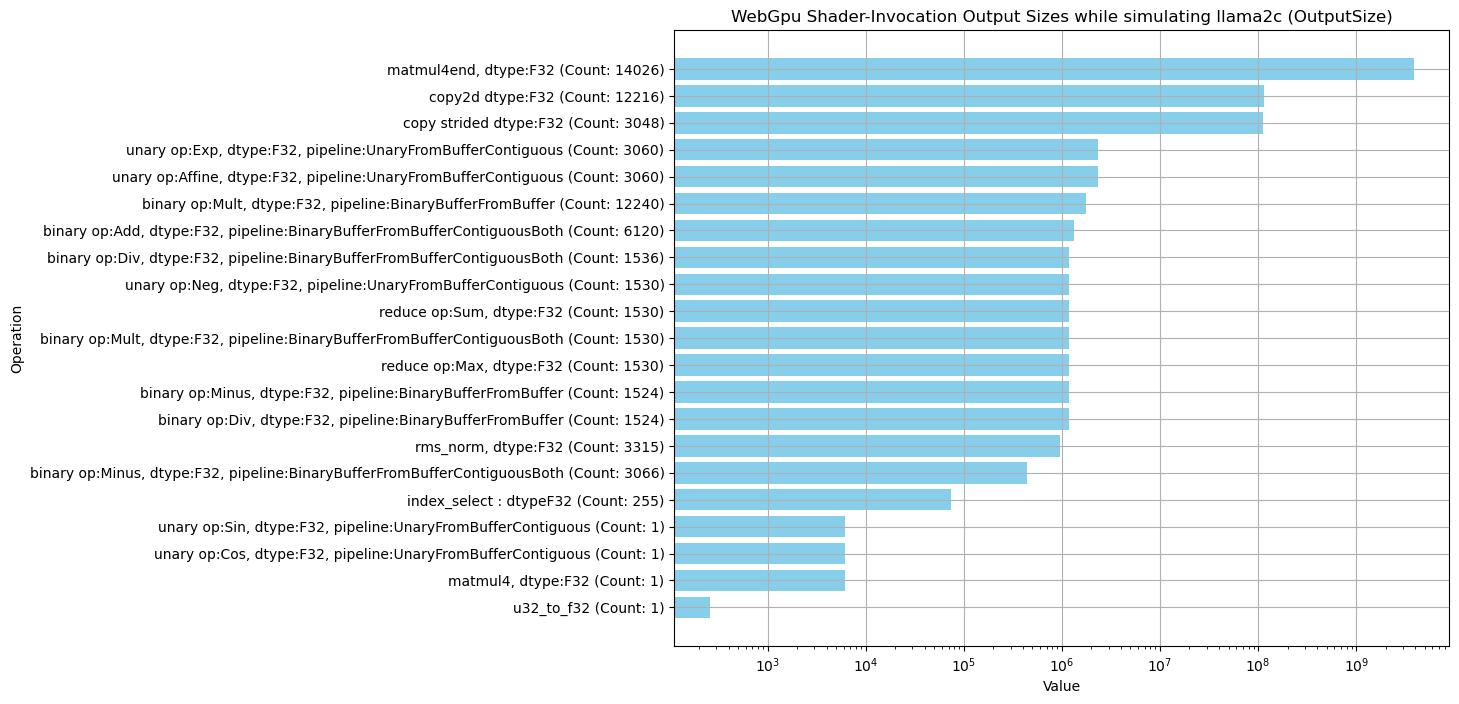

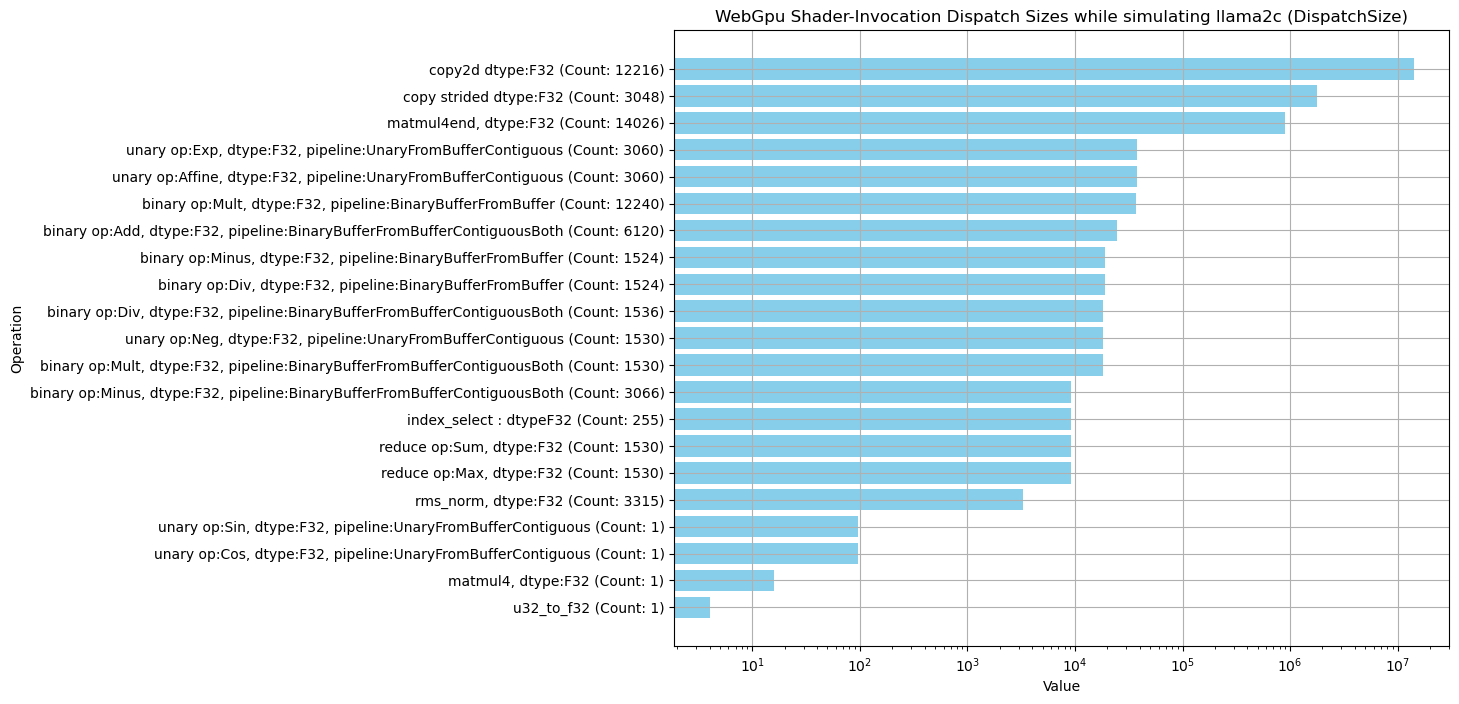

In [36]:
# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"llama2c")

Total sum for Duration: 9.591851903999993
Operations sorted by total duration for Duration:
Operation: matmul5, dtype:F32, Duration: 2.819538784, Count: 416 Perc:29.40%
Operation: matmul1end, dtype:F32, Duration: 1.6715929600000001, Count: 274 Perc:17.43%
Operation: conv2d, kernel:F32 dtype:[1280, 1280, 3, 3], Duration: 1.047871488, Count: 20 Perc:10.92%
Operation: conv2d, kernel:F32 dtype:[640, 640, 3, 3], Duration: 0.667067392, Count: 8 Perc:6.95%
Operation: conv2d, kernel:F32 dtype:[320, 320, 1, 1], Duration: 0.559934464, Count: 10 Perc:5.84%
Operation: conv2d, kernel:F32 dtype:[1280, 2560, 3, 3], Duration: 0.441136128, Count: 5 Perc:4.60%
Operation: conv2d, kernel:F32 dtype:[320, 320, 3, 3], Duration: 0.42634752, Count: 8 Perc:4.44%
Operation: conv2d, kernel:F32 dtype:[320, 640, 3, 3], Duration: 0.239514624, Count: 2 Perc:2.50%
Operation: conv2d, kernel:F32 dtype:[640, 640, 1, 1], Duration: 0.239476736, Count: 10 Perc:2.50%
Operation: conv2d, kernel:F32 dtype:[1280, 1280, 1, 1], Du

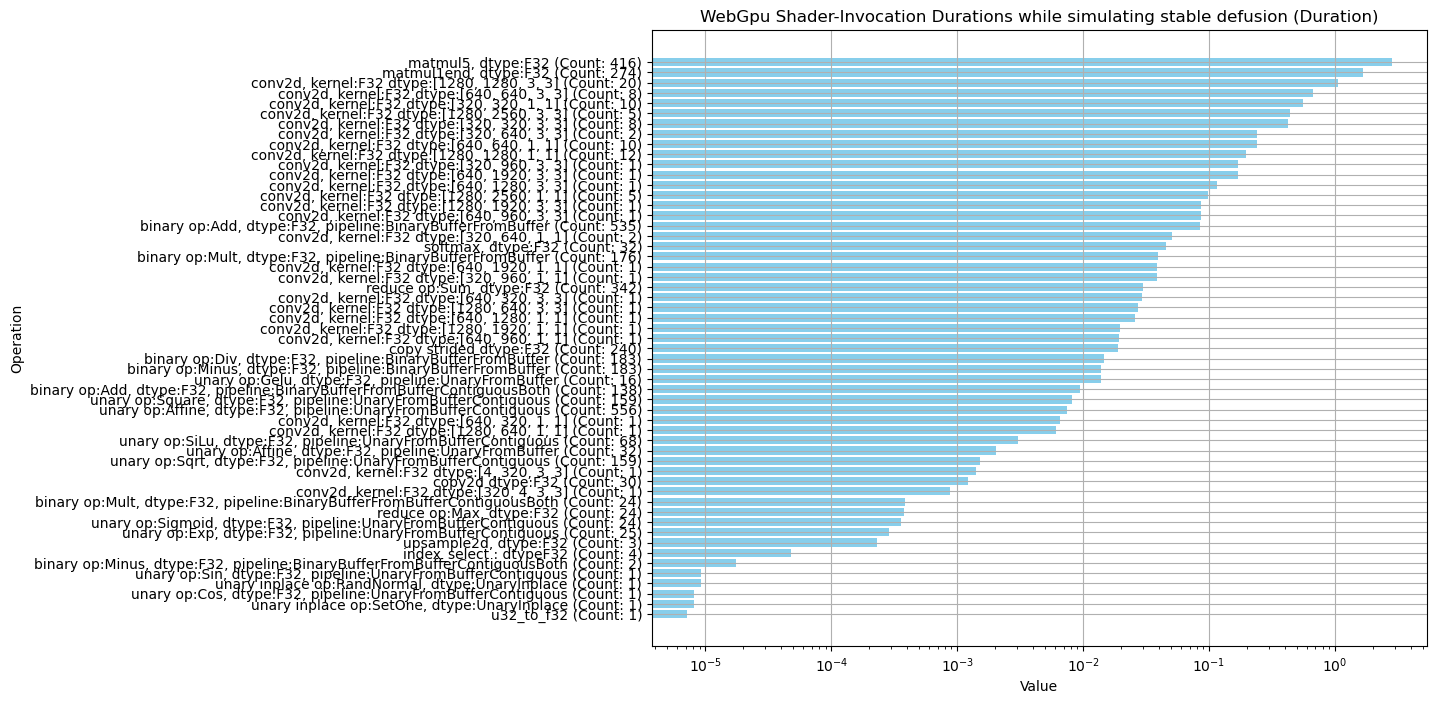

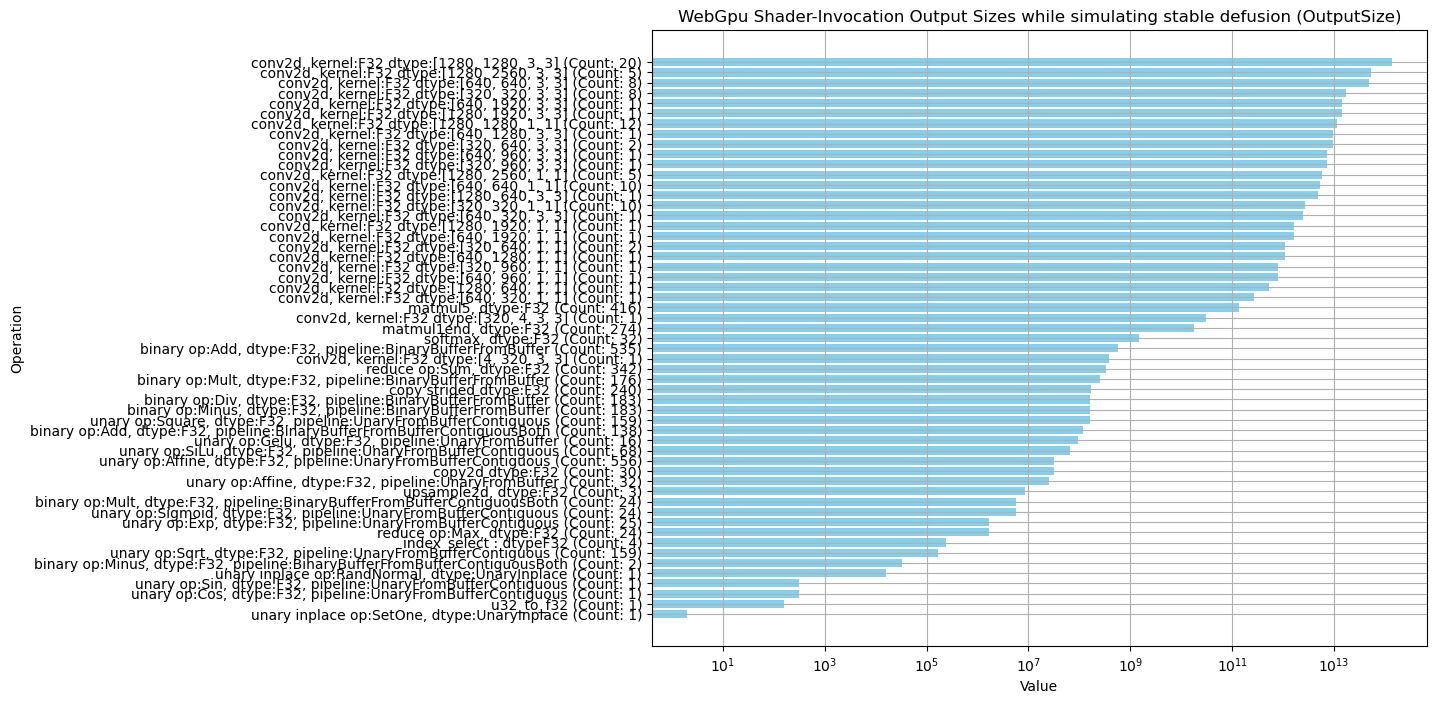

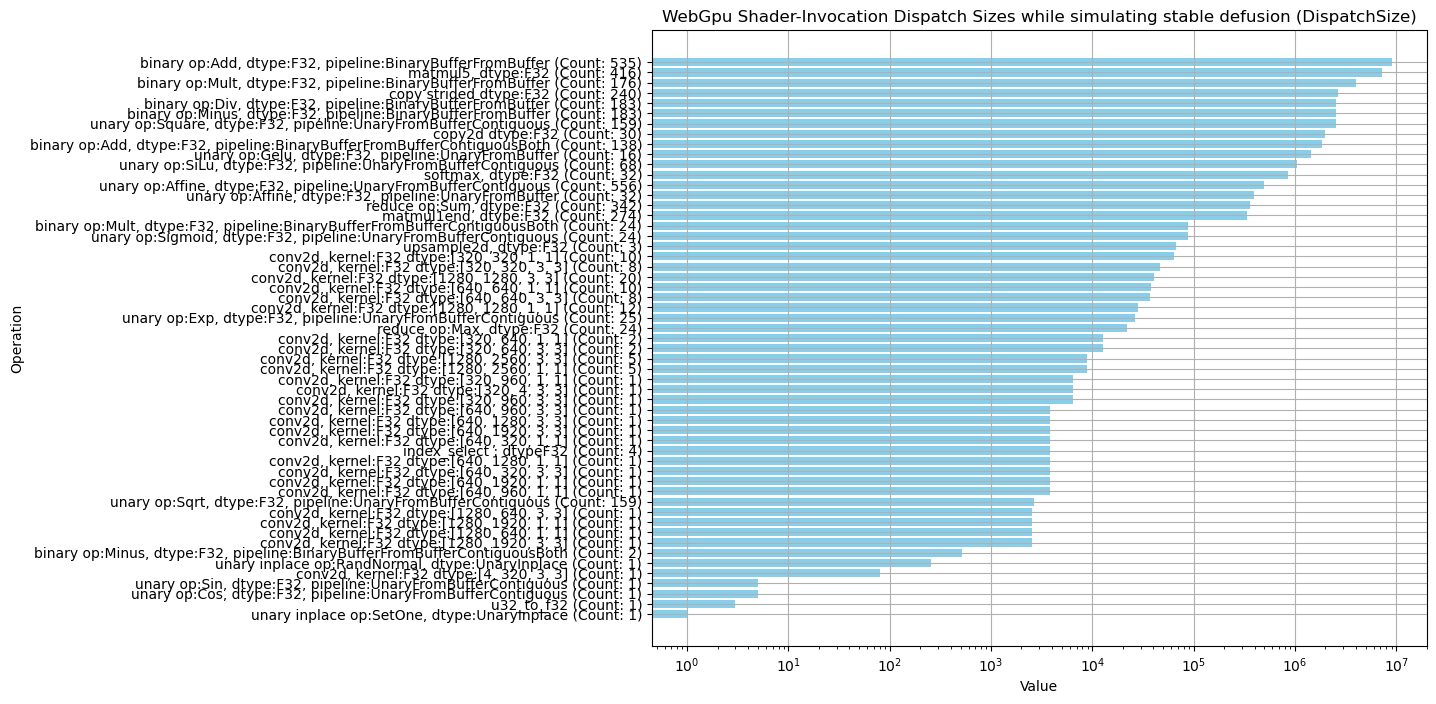

In [11]:
# Load JSON data from a file
with open('candle-examples\wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"stable defusion")

Total sum for Duration: 7.422841696
Operations sorted by total duration for Duration:
Operation: matmul4end, dtype:F32, Duration: 7.422708576, Count: 146335 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, Duration: 0.00013312, Count: 2 Perc:0.00%
Total sum for OutputSize: 613777672192.0
Operations sorted by total outputsize for OutputSize:
Operation: matmul4end, dtype:F32, OutputSize: 613773475840.0, Count: 146335 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, OutputSize: 4196352.0, Count: 2 Perc:0.00%
Total sum for DispatchSize: 18796448.0
Operations sorted by total dispatchsize for DispatchSize:
Operation: matmul4end, dtype:F32, DispatchSize: 18730880.0, Count: 146335 Perc:99.65%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, DispatchSize: 65568.0, Count: 2 Perc:0.35%


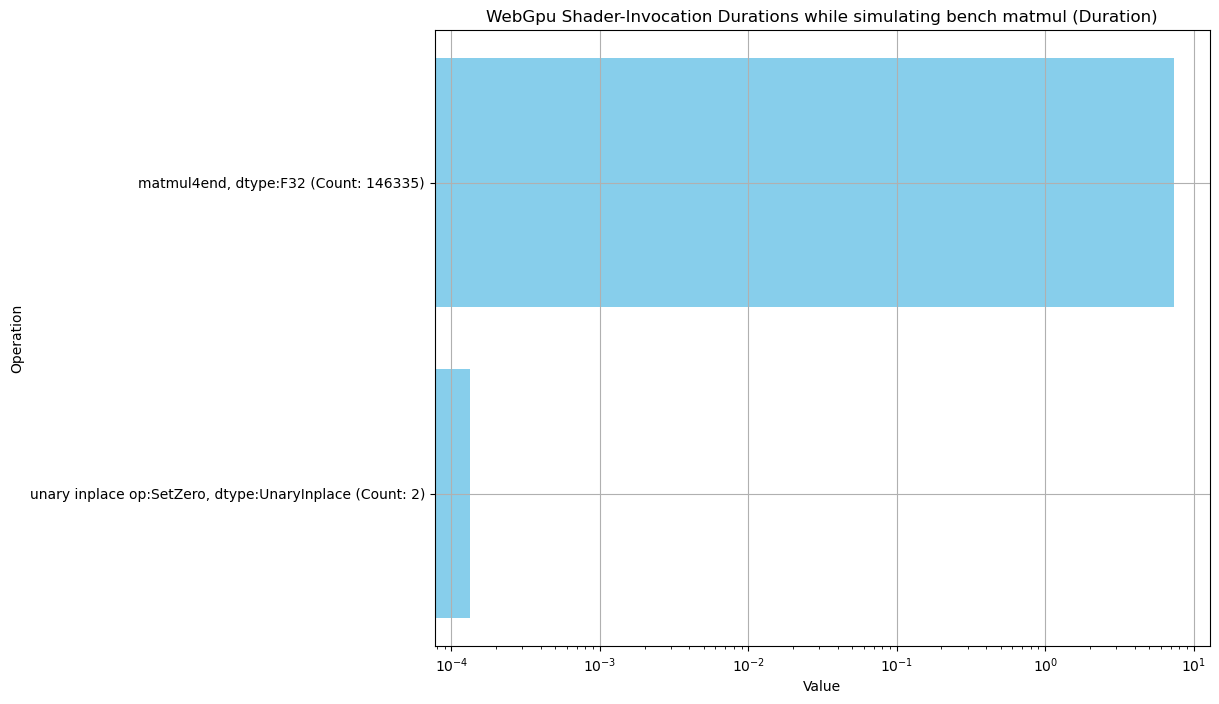

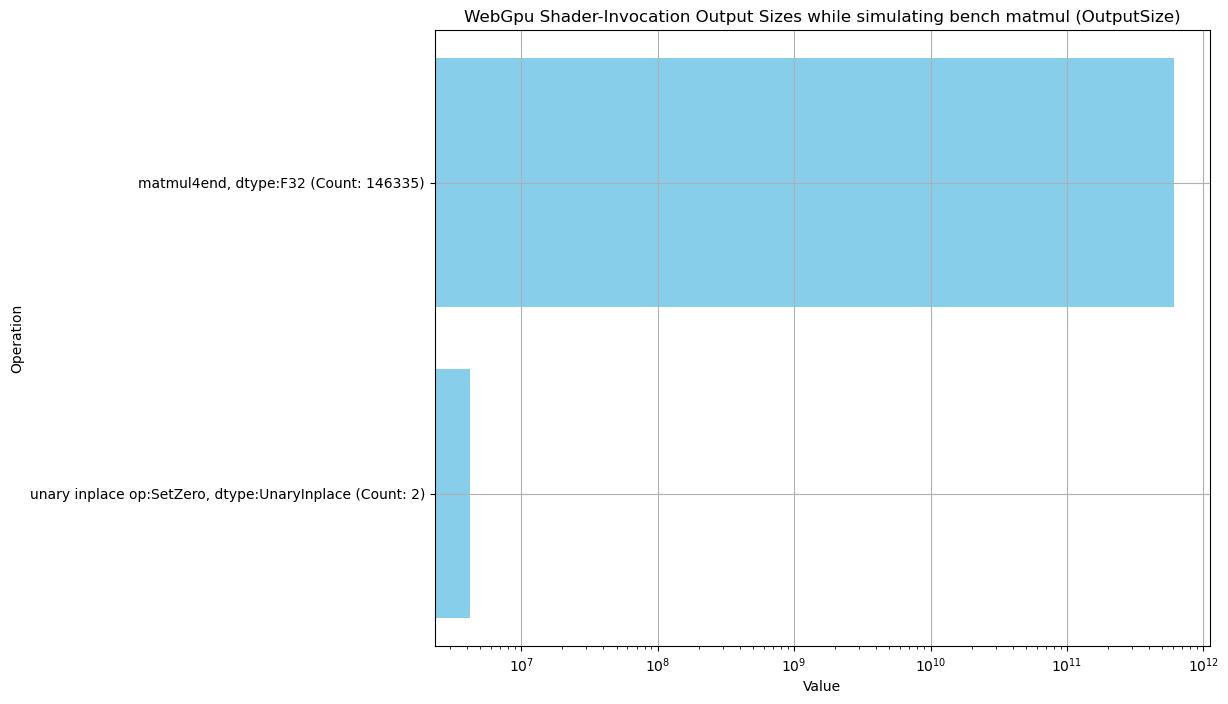

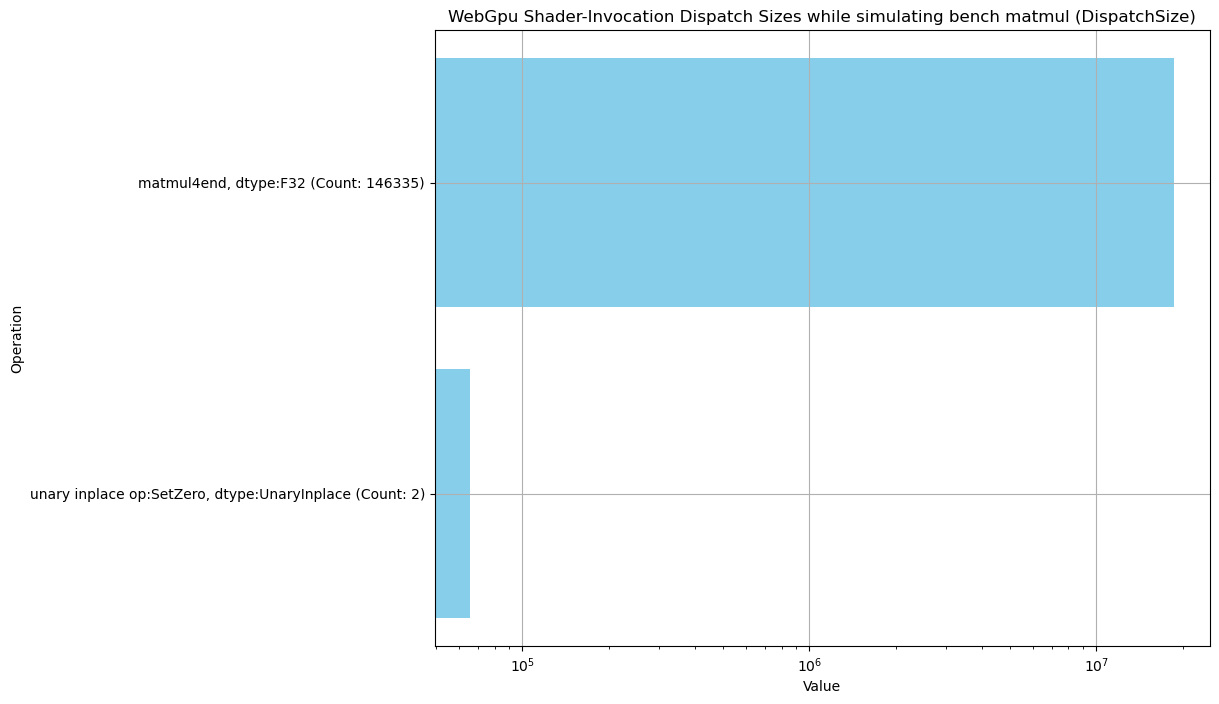

In [32]:
# Load JSON data from a file
with open('candle-core\wgpu_bench.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"bench matmul")

Total sum for Duration: 10.005065728000002
Operations sorted by total duration for Duration:
Operation: matmul4, dtype:F32, Duration: 10.004849664000002, Count: 555 Perc:100.00%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, Duration: 0.000216064, Count: 2 Perc:0.00%
Total sum for OutputSize: 8388608.0
Operations sorted by total outputsize for OutputSize:
Operation: unary inplace op:SetZero, dtype:UnaryInplace, OutputSize: 8388608.0, Count: 2 Perc:100.00%
Operation: matmul4, dtype:F32, OutputSize: 0.0, Count: 555 Perc:0.00%
Total sum for DispatchSize: 9224192.0
Operations sorted by total dispatchsize for DispatchSize:
Operation: matmul4, dtype:F32, DispatchSize: 9093120.0, Count: 555 Perc:98.58%
Operation: unary inplace op:SetZero, dtype:UnaryInplace, DispatchSize: 131072.0, Count: 2 Perc:1.42%


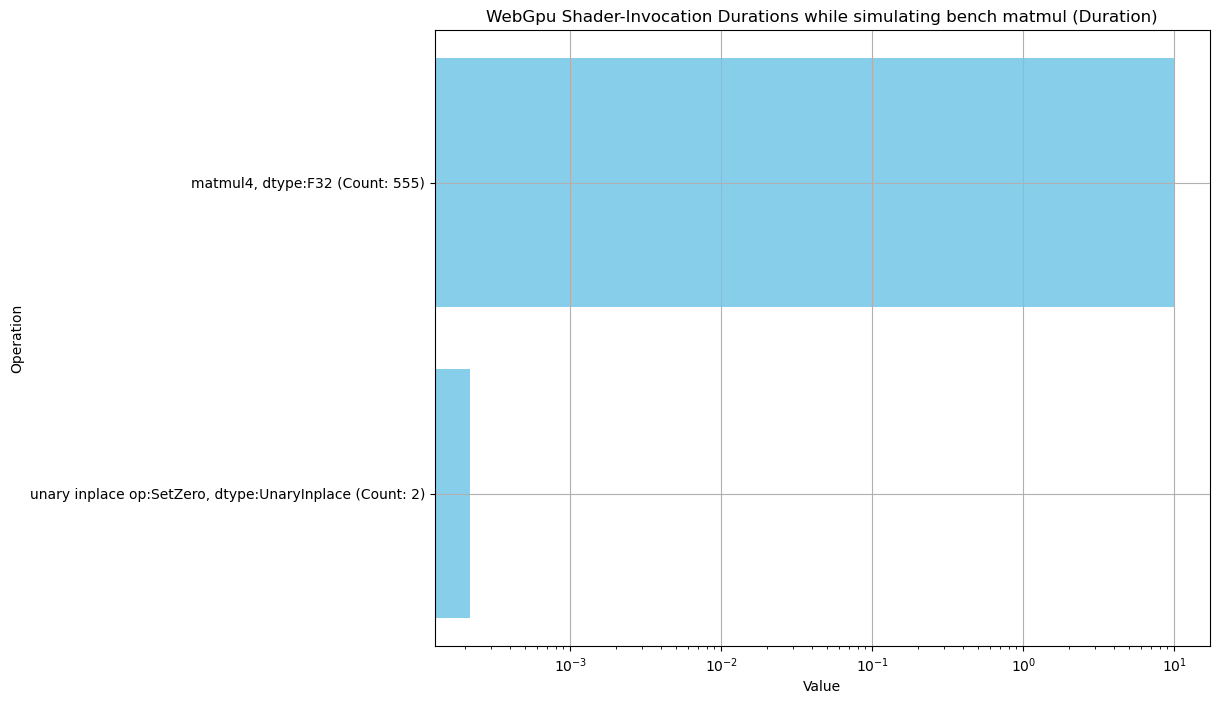

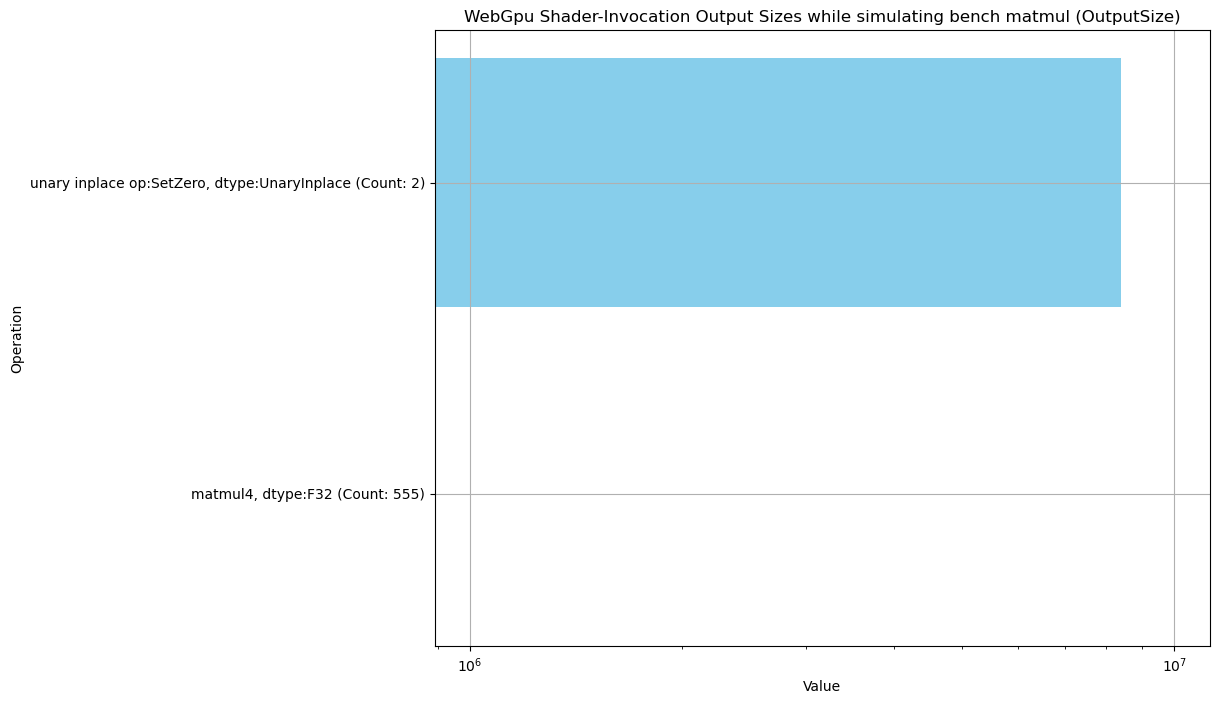

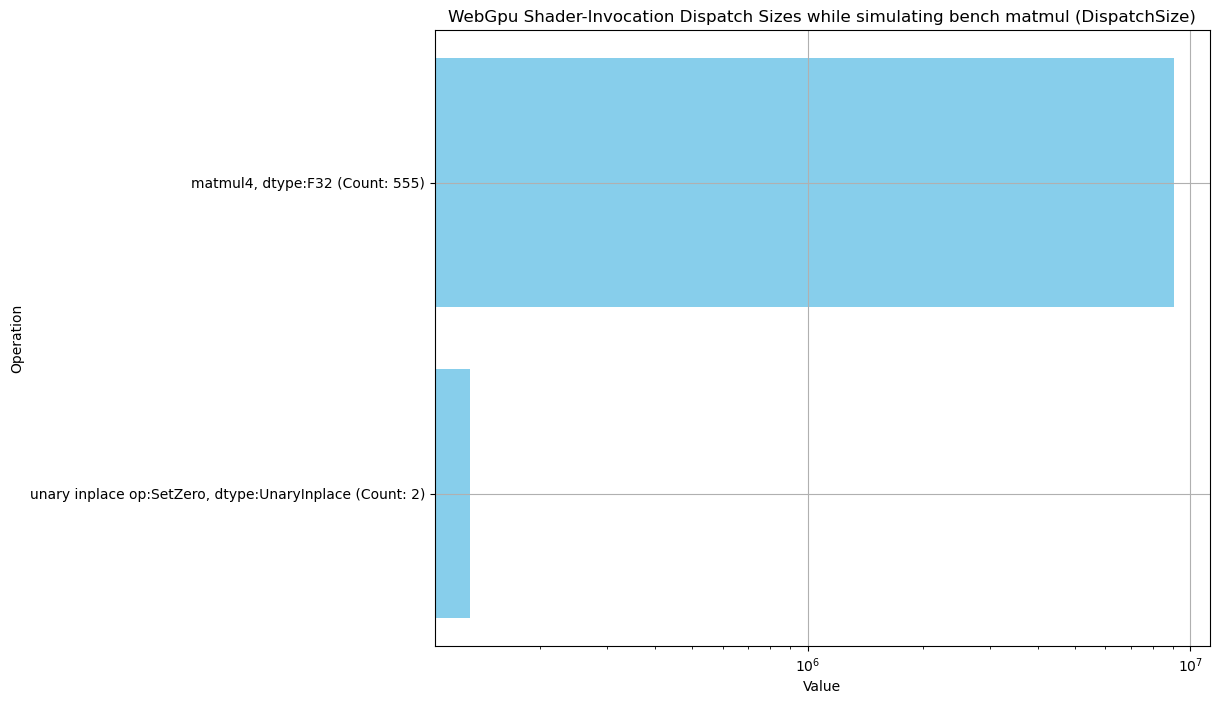

In [35]:
# Load JSON data from a file
with open('candle-core\wgpu_bench2048.json', 'r') as file:
    data = json.load(file)

analyse_file(data,"bench matmul")

In [19]:
import numpy as np

def matmul(global_id, op_matmul, v_input1, v_input2):
    x = global_id[0] * 4
    y = global_id[1] * 4
    batch = global_id[2]

    if x >= op_matmul[3]:
        return
    if y >= op_matmul[1]:
        return

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_n = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[9]
    input2_stride_k = op_matmul[8]

    m_input1_offset = input1_offset + input1_stride_m * y + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_k * x + batch * input2_stride_b

    a = np.zeros((4, 4), dtype=np.float32)
    b = np.zeros((4, 4), dtype=np.float32)
    c = np.zeros((4, 4), dtype=np.float32)

    count = (op_matmul[2] + 3) // 4

    for t in range(count):
        # load tiles:
        for ix in range(4):
            ix2 = ix + t * 4
            for iy in range(4):
                iy2 = iy + t * 4
                a_x = input1_stride_n * ix2 + input1_stride_m * iy + m_input1_offset
                b_x = input2_stride_n * iy2 + input2_stride_k * ix + m_input2_offset

                if ix2 >= op_matmul[2] or y + iy >= op_matmul[1]:
                    a[iy][ix] = 0.0
                else:
                    a[iy][ix] = v_input1[a_x]

                if iy2 >= op_matmul[2] or x + ix >= op_matmul[3]:
                    b[iy][ix] = 0.0
                else:
                    b[iy][ix] = v_input2[b_x]

        # add to c
        c += np.dot(b, a)

    dest_offset = batch * output_size_of_one_batch + y * op_matmul[3] + x
    for ix in range(4):
        for iy in range(4):
            if ix + x < op_matmul[3] and iy + y < op_matmul[1]:
                v_dest[dest_offset + ix + iy * op_matmul[3]] = c[iy][ix]

# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
v_input2 = np.array([3.0, 4.0])  # Example input tensor 2


v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function

for x in range(8):
    for y in range(8):
        matmul([x,y,0], op_matmul, v_input1, v_input2)

# Output result
print(v_dest.reshape((2,2)))

[[11.  0.]
 [ 0.  0.]]


In [22]:
import numpy as np

def workgroupBarrier():
    pass  # No operation needed for barrier in Python single-threaded context

# Workgroup shared memory (simulated)
Asub = np.zeros((16, 16), dtype=np.float32)
Bsub = np.zeros((16, 16), dtype=np.float32)

ZERO = 0.0
TS = 16

def matmul3(global_id, local_id, op_matmul, v_input1, v_input2, v_dest, counter):
    gx = global_id[0]
    gy = global_id[1]
    
    lx = local_id[0]
    ly = local_id[1]

    batch = global_id[2]

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_k = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[8]
    input2_stride_k = op_matmul[9]

    m_input1_offset = input1_offset + input1_stride_m * gy + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_n * gx + batch * input2_stride_b

    numTiles = op_matmul[2] // 16  # may be 0, if k is smaller than 16

    acc = ZERO
    for t in range(0, op_matmul[2] , TS):
        tiledX = 16 * t + lx
        tiledY = 16 * t + ly

        
        if (tiledX < op_matmul[2] and gy < op_matmul[1]):
            Asub[lx, ly] = v_input1[m_input1_offset + tiledX * input1_stride_k]
        else:
            Asub[lx, ly] = 0
        if (tiledY < op_matmul[2] and gx < op_matmul[3]):
            Bsub[lx, ly] = v_input2[m_input2_offset + tiledY * input2_stride_k]
        else:
            Bsub[lx, ly] = 0

        
        if gx >= op_matmul[3]:
            return
        if gy >= op_matmul[1]:
            return

        


        if counter < TS * TS:
            return

        for k in range(16):
            acc += Asub[k, ly] * Bsub[lx, k]

    v_dest[batch * output_size_of_one_batch + gy * op_matmul[3] + gx] = acc



# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

#op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
#v_input2 = np.array([3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]) # Example input tensor 1
v_input2 = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0])  # Example input tensor 2

v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function
counter = 0
for x in range(16):
    for y in range(16):
        matmul3([x,y,0],[x,y,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

for x2 in range(16):
    for y2 in range(16):
        matmul3([x2,y2,0],[x2,y2,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

# Output result
print(v_dest.reshape((2,2)))


[[16. 19.]
 [52. 64.]]


In [6]:
import numpy as np

ZERO = 0

Asub = np.zeros((16, 16), dtype=np.float32)
Bsub = np.zeros((16, 16), dtype=np.float32)
def matmul4_end(op_matmul, v_input1, v_input2, v_dest, global_id, local_id, counter):
    if global_id[0] < op_matmul[12] and global_id[1] < op_matmul[13]:
        return
    
    gx = global_id[0]
    gy = global_id[1]
    
    lx = local_id[0]
    ly = local_id[1]

    batch = global_id[2]
  
    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_k = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[8]
    input2_stride_k = op_matmul[9]

    m_input1_offset = input1_offset + input1_stride_m * gy + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_n * gx + batch * input2_stride_b

    if gy >= op_matmul[1] and gx >= op_matmul[3]:
        return

    acc = ZERO
    for t in range(0, op_matmul[2], 16):
        if gy < op_matmul[1]:
            tiledX = t + lx
            if tiledX < op_matmul[2]:
                Asub[lx, ly] = v_input1[m_input1_offset + tiledX * input1_stride_k]
        
        if gx < op_matmul[3]:
            tiledY = t + ly
            if tiledY < op_matmul[2]:
                Bsub[ly, lx] = v_input2[m_input2_offset + tiledY * input2_stride_k]

        if counter:
            return

        if gy < op_matmul[1] and gx < op_matmul[3]:
            count = min(op_matmul[2] - t, 16)
            for k in range(count):
                acc += Asub[k, ly] * Bsub[k, lx]

    if gy < op_matmul[1] and gx < op_matmul[3]:
        v_dest[batch * output_size_of_one_batch + gy * op_matmul[3] + gx] = acc

# Example usage with dummy data
size = 17
op_matmul = np.array([1, size,size,size, 1, size, 1, 0, 1, size, 1, 0,16,16], dtype=np.uint32)
v_input1 = np.arange(0, size*size).astype(np.float32)
v_input2 = np.arange(0, size*size).astype(np.float32)
v_dest = np.zeros((size*size), dtype=np.float32)


#for wx in range(2):
wx = 0
wy = 1
for wx in range(2):
    for wy in range(2):
        for x in range(16):
            for y in range(16):
                matmul4_end(op_matmul, v_input1, v_input2,v_dest, (wx*16+x,wy*16+y,0), (x,y,0), True)

        for x2 in range(16):
            for y2 in range(16):
                matmul4_end(op_matmul, v_input1, v_input2,v_dest, (wx*16+x2,wy*16+y2,0), (x2,y2,0), False)

print(v_dest.reshape(size,size))

[[     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.  27608.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.  76160.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 124712.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 173264.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 221816.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 270368.]
 [     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0. 318920.]
 [     0.    

In [15]:
def parse_data(data):
    """
    Parses the data and extracts relevant information.
    Assumes data is a list of strings.
    """
    bindgroup_creation = {}
    
    open_buffers = {}

    buffer_reuse = {}
    buffer_create = {}
    buffer_dropped = {}
   
    counter = 0 
    for line in data:
        if "Buffer Reuse" in line:
            data = line.split(" ")
            _, _, buffer_id, _, reference_id = data
            open_buffers[int(buffer_id)] = int(reference_id)
            buffer_reuse[(int(reference_id), counter)] = int(buffer_id)
        elif "Bindgroup Create Cached" in line:
            data = line.split(":")
            _, bindgroup, reference_id, pipeline = data
            bindgroup = bindgroup.replace(", reference_dest id", "")
            reference_id = reference_id.replace(", pipeline", "")
            bindgroup_creation[int(reference_id)] = pipeline.strip()
        elif "Buffer Create" in line:
            data = line.split(" ")
            _, _, buffer_id, _, reference_id = data
            buffer_create[(int(reference_id), counter)] = int(buffer_id)
            open_buffers[int(buffer_id)] = int(reference_id)
        elif "Buffer Cache" in line:
            data = line.split(" ")
            _, _, buffer_id, _, _, reference_id = data
            buffer_dropped[(int(reference_id), counter)] = int(buffer_id)
            #open_buffers.pop(int(buffer_id), None)
        elif "START CACHE" in line:
            counter += 1
    
    

    for key in open_buffers:
        buffer = open_buffers[key]
        if buffer in bindgroup_creation:
            print(f"buffer {key} refrenced by {buffer}({bindgroup_creation[buffer]})")
        else:
            print(f"buffer {key} refrenced by {buffer}")




    return buffer_reuse, bindgroup_creation

def analyze_data(buffer_reuse, bindgroup_creation):
    """
    Analyzes the data to identify patterns.
    """
    # Your analysis logic here
    # For example, check if certain buffers are reused frequently or if specific bindgroups are recreated often.

    # Print results (you can customize this part)
    print("Buffer Reuse:")
    for buffer_id, reference_id in buffer_reuse.items():
        print(f"Buffer {buffer_id} reused for Reference {reference_id}")

    print("\nBindgroup Creation:")
    for reference_id, pipeline in bindgroup_creation.items():
        print(f"Reference {reference_id}: Pipeline {pipeline}")

if __name__ == "__main__":
    with open("candle-examples/debug-llama2c.txt") as file:
        data = file.read()
    data = data.split("\n")
    # # Example data (replace with your actual data)
    # data = [
    #     "Buffer Reuse 15 for 19",
    #     # ... other lines ...
    #     "Bindgroup Create Cached: 535, reference_dest id: 27, pipeline: PipelineType(Binary(F32), ...)",
    # ]

    buffer_reuse, bindgroup_creation = parse_data(data)
    #analyze_data(buffer_reuse, bindgroup_creation)

buffer 0 refrenced by 0
buffer 1 refrenced by 1
buffer 2 refrenced by 2
buffer 3 refrenced by 3
buffer 4 refrenced by 4
buffer 5 refrenced by 5
buffer 6 refrenced by 6
buffer 7 refrenced by 7
buffer 8 refrenced by 8
buffer 9 refrenced by 9
buffer 10 refrenced by 10
buffer 11 refrenced by 11
buffer 12 refrenced by 12
buffer 13 refrenced by 45(PipelineType(Binary(F32), BinaryBufferFromBuffer))
buffer 14 refrenced by 29(PipelineType(Binary(F32), BinaryBufferFromBufferContiguousBoth))
buffer 15 refrenced by 19(PipelineType(Binary(F32), BinaryBufferFromBuffer))
buffer 16 refrenced by 26(PipelineType(Matmul(F32), Matmul1endBuffer))
buffer 17 refrenced by 205(PipelineType(Matmul(F32), Matmul1endBuffer))
buffer 18 refrenced by 204(PipelineType(Binary(F32), BinaryBufferFromBuffer))
buffer 19 refrenced by 36(PipelineType(Matmul(F32), Matmul1endBuffer))
buffer 20 refrenced by 34(PipelineType(Unary(F32), UnaryFromBufferContiguous))
buffer 21 refrenced by 104(PipelineType(Unary(F32), UnaryFromBuffe